<a href="https://colab.research.google.com/github/Thahraf/workshop-2/blob/main/tensor_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## **LOAD DATASET**

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
fashion_mnist

<module 'keras.api.datasets.fashion_mnist' from '/usr/local/lib/python3.11/dist-packages/keras/api/datasets/fashion_mnist/__init__.py'>

In [ ]:
(train_image,train_label),(test_image,test_label) = fashion_mnist.load_data()

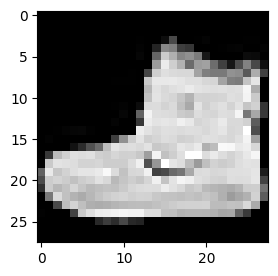

In [ ]:
plt.figure(figsize=(3,3))
plt.imshow(train_image[0],cmap='gray')

In [ ]:
train_image.shape

(60000, 28, 28)

In [ ]:
Classes =['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
train_label.shape

(60000,)

In [ ]:
test_label.shape

(10000,)

In [ ]:
#preprocessing the images

train_image = train_image / 255.0
test_image = test_image / 255.0
train_image

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

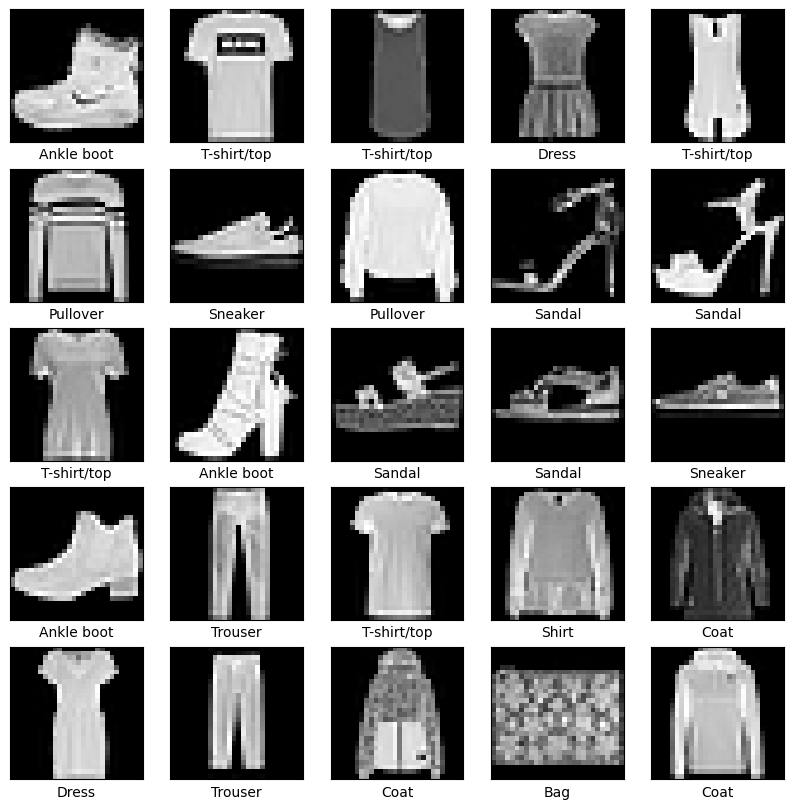

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_image[i],cmap='gray')
  plt.xlabel(Classes[train_label[i]])
  plt.show

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
model.fit(train_image,train_label,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7836 - loss: 0.6337
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8615 - loss: 0.3901
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8756 - loss: 0.3441
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8831 - loss: 0.3160
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8925 - loss: 0.2912
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8966 - loss: 0.2753
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8993 - loss: 0.2720
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9032 - loss: 0.2598
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9082 - loss: 0.2489
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9112 - loss: 0.2390


In [ ]:
model_loss,model_acc = model.evaluate(test_image,test_label)
print(f'ACCURACY :{model_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8828 - loss: 0.3427
ACCURACY :0.8815000057220459


In [ ]:
nn = model.predict(test_image)
nn

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[ -9.079628  , -14.165354  , -14.287834  , ...,   0.6059197 ,
         -9.441598  ,   5.010994  ],
       [  3.184476  , -12.886831  ,   9.644373  , ..., -24.62619   ,
         -8.907356  , -17.162823  ],
       [  0.31573808,  20.871483  ,  -7.114047  , ..., -29.456495  ,
         -8.133838  , -23.295858  ],
       ...,
       [ -7.513433  , -16.22381   ,  -6.557209  , ...,  -9.0098    ,
          7.7964544 , -19.051115  ],
       [ -6.195631  ,   9.780711  , -10.481658  , ..., -23.222477  ,
         -7.820753  , -17.09418   ],
       [ -5.436676  , -11.753769  ,  -8.368481  , ...,  -0.78393817,
         -1.3217857 ,  -6.178532  ]], dtype=float32)

In [ ]:
nn[0]

array([ -9.079628 , -14.165354 , -14.287834 , -12.936048 , -20.165415 ,
        -3.58426  , -10.3208065,   0.6059197,  -9.441598 ,   5.010994 ],
      dtype=float32)

In [ ]:
probability_result = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [ ]:
prediction = probability_result.predict(test_image)
prediction[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([7.5018391e-07, 4.6394359e-09, 4.1046166e-09, 1.5861580e-08,
       1.1499309e-11, 1.8271567e-04, 2.1683570e-07, 1.2065567e-02,
       5.2235555e-07, 9.8775023e-01], dtype=float32)

In [ ]:
np.argmax(prediction[0])

9

In [ ]:
test_label[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  # Changed 'classes' to 'Classes' to match the variable defined earlier
  plt.xlabel("{} {:2.0f}% ({})".format(Classes[predicted_label],
                                100*np.max(predictions_array),
                                Classes[true_label]), # Fixed the typo here
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

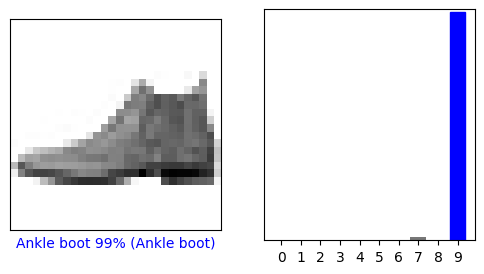

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction[i], test_label, test_image)
plt.subplot(1,2,2)
plot_value_array(i, prediction[i],  test_label)
plt.show()

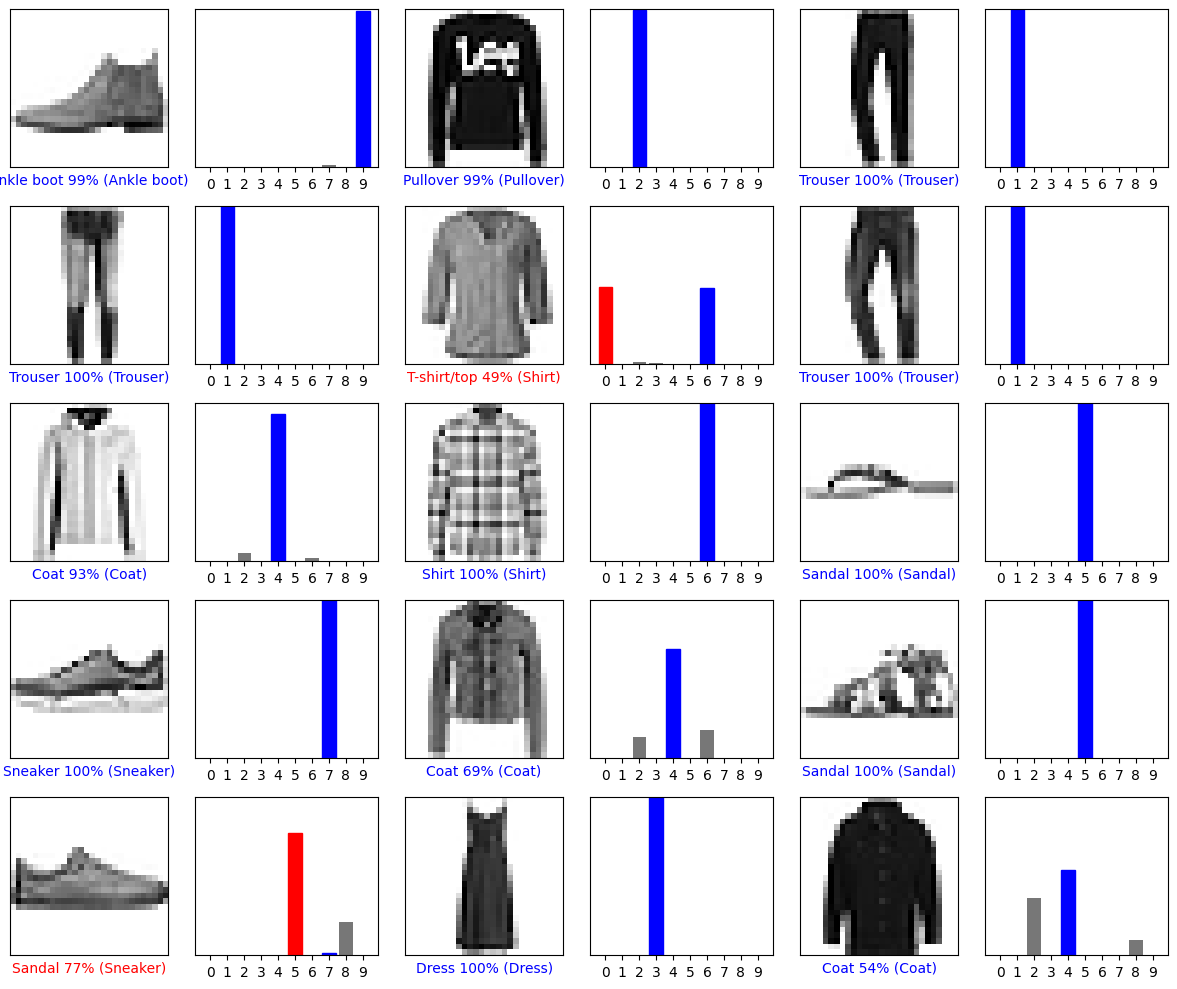

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediction[i], test_label, test_image)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediction[i], test_label)
plt.tight_layout()
plt.show()

In [ ]:
img = test_image[1]
img.shape

(28, 28)

In [ ]:
img = np.expand_dims(img,0)
img.shape

(1, 28, 28)

In [ ]:
single_prediction = probability_result.predict(img)
single_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[1.5543172e-03, 1.6287742e-10, 9.9319845e-01, 1.7111752e-06,
        1.1639477e-03, 7.3029446e-14, 4.0815631e-03, 1.2987296e-15,
        8.7120746e-09, 2.2637044e-12]], dtype=float32)

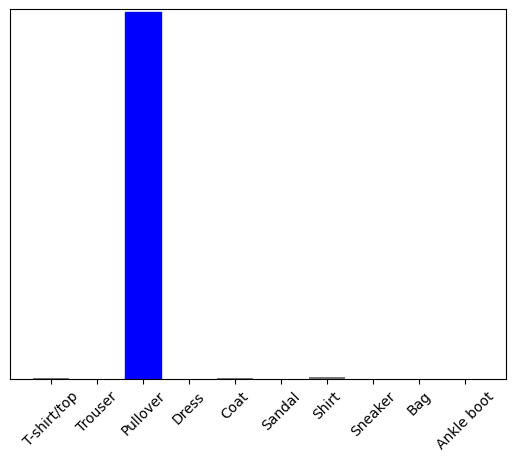

In [ ]:
plot_value_array(1, single_prediction[0], test_label)
_ = plt.xticks(range(10), Classes, rotation=45)
plt.show()

In [ ]:
test_label[1]

2